In [1]:
import numpy as np
x= np.random.uniform(0,1,100)

In [9]:
t_vals= np.linspace(0.01, 0.99,100)
F_hat= np.array([np.sum(x<=t)/100 for t in t_vals])
F_hat

array([0.01, 0.02, 0.02, 0.02, 0.04, 0.05, 0.08, 0.08, 0.1 , 0.12, 0.12,
       0.13, 0.14, 0.14, 0.16, 0.18, 0.19, 0.19, 0.19, 0.19, 0.2 , 0.22,
       0.22, 0.22, 0.25, 0.25, 0.25, 0.25, 0.25, 0.26, 0.26, 0.27, 0.28,
       0.28, 0.28, 0.29, 0.29, 0.31, 0.31, 0.33, 0.34, 0.36, 0.36, 0.38,
       0.38, 0.38, 0.39, 0.41, 0.41, 0.42, 0.43, 0.44, 0.47, 0.47, 0.49,
       0.51, 0.51, 0.53, 0.54, 0.56, 0.56, 0.57, 0.59, 0.6 , 0.64, 0.65,
       0.65, 0.65, 0.66, 0.67, 0.68, 0.7 , 0.71, 0.71, 0.71, 0.73, 0.73,
       0.73, 0.74, 0.76, 0.76, 0.78, 0.78, 0.78, 0.8 , 0.81, 0.81, 0.85,
       0.86, 0.87, 0.88, 0.91, 0.92, 0.93, 0.95, 0.96, 0.97, 0.97, 0.97,
       0.98])

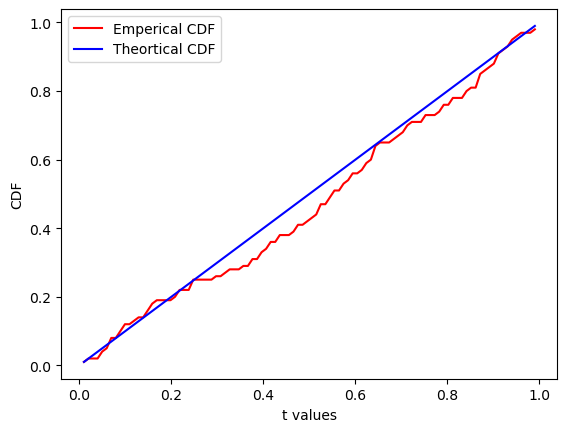

In [8]:
# theortical CDF
F= t_vals   #since cdf of uniform is t 

# plot F_hat and F
import matplotlib.pyplot as plt

plot1= plt.plot(t_vals, F_hat, color='red', label='Emperical CDF')
plot2= plt.plot(t_vals, F, color='blue', label='Theortical CDF')
plt.xlabel('t values')
plt.ylabel('CDF')
plt.legend()
plt.show()

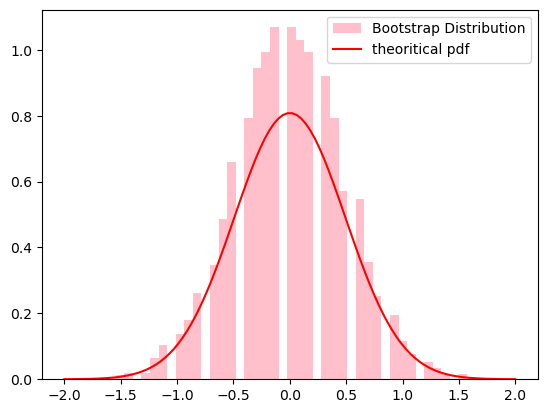

In [21]:
# bootstarp sampling
import scipy.stats as stats
t= 0.5
F_hat_t= np.sum(x<=t)/100

bootstrap= []
for i in range(10000):
    bootstrap_sample= np.random.choice(x,100,replace=True)
    F_hat_star= np.sum(bootstrap_sample<= t)/100
    scaled= 10*(F_hat_star- F_hat_t)
    bootstrap.append(scaled)
std= np.sqrt(F_hat_t*(1-F_hat_t))
x_vals= np.linspace(-2,2,100)
theoritical_pdf= stats.norm.pdf(x_vals,0, std)

import matplotlib.pyplot as plt

shreya= plt.hist(bootstrap, bins=50,density= True, label='Bootstrap Distribution',color='pink')
samri= plt.plot(x_vals, theoritical_pdf, color='red', label='theoritical pdf')
plt.legend()
plt.show()

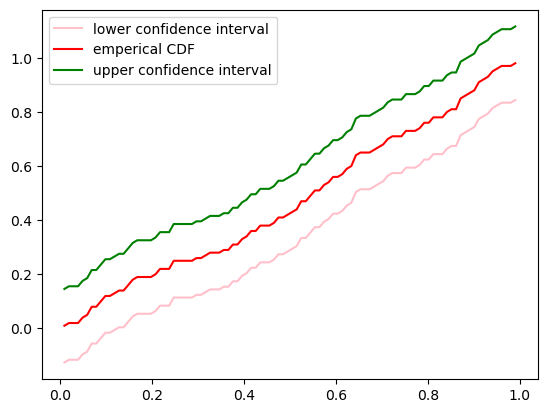

In [24]:
# confidence interval
import math
e = np.sqrt((1/200)*math.log(2/0.05))
L = F_hat - e
U = F_hat +e

pawam= plt.plot(t_vals, L, color='pink', label='lower confidence interval')
samri= plt.plot(t_vals, F_hat, color= 'red', label= 'emperical CDF')
shreya= plt.plot(t_vals, U, color='green', label='upper confidence interval')
plt.legend()
plt.show()